<a href="https://colab.research.google.com/github/jackyhuynh/indeed_jobs_analyst_using_python/blob/main/project_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report Model I:  POS Tokenization and Keywords Filtering


## Summary:
POS Tokenization and Keywords Filtering aims to filter keywords in the resume and match them with tokenized job_description (after clean up, tidy, token stored in data lake). The matching result is stored in another data frame for further advising and career recommendations.

## Data Tidy:

### Process:
Tidy Data process in the following steps:
- Data Description: quick check of data type, statistic, etc.
- Check missing values
- Evaluate attributes
- Remove unwanted attributes:
    - Drop columns: 'jobid’, 'apply_link’, 'company_link’, 'country’, 'current_url’, 'date_posted’, 'date_posted_parsed’, 'domain’, 'region’, 'srcname’ because they will not relevant to our ML Model
    - Drop rows: where the company name or job title is blank (no point to keep); where company and reviews count is 0

- Fix NA attributes:
    - Change ‘null’: in the ‘benefits’ columns to ‘no benefits’ 
    - Change ‘null’ in the ‘qualifications’ columns to ‘no qualifications’ 
    - Change ‘null’ in the ‘salary_formated’ to ‘neogotiable’
    - Change ‘null’: in the ‘country_code’ to ‘other’
- Tidy Data
    - Remove more than 100,000 rows and 10 columns.
    
![](./images/data_process.PNG)


### Data after Tidy Summary:
Name this data tidy version I, we will also use this for our 2nd Model

![](./images/data_description_new.PNG)

## NLP Processing:
After Data Tidy, and Resume Tidy (Transformation), then NLP will be processed in the following steps:

Streamlining the Job Descriptions using NLP Techniques:
- Step 1: Part of Speech (POS): tagging keywords list (which filter from candidate resume) with indetified tags from NLTK package

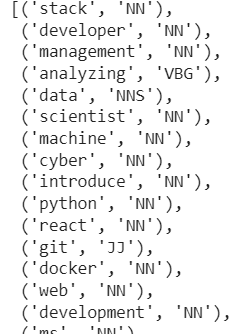

- Step 2: Using the found tags as filter to filter out all the unrelated tags which means the words without these below tags will be removed from job_description 
```
# In this case the list of tags is
include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS'] 
```
- Step 3: Tokenizing the Job Descriptions: parsing the text string into different sections by applying the filter in step 2 (include_tags)
- Step 4: Steaming the words: The stemming process allows computer programs to identify the words of the same stem despite their different look (e.g. “models”, and “modeling” both have the same stem of “model”)

![steamer.PNG](./images/steamer.png)

- Step 5:Lowercasing the words
Sample of job description after transformation

![](./images/transform.png)

### Run Model
- Using Set (Python Data Structures) to return the similarity of each job compare to the skill set in the resume.The frequency list will be create by the amount of time a words (skill) appear in each job and combine them to caluclate the over all percentage.There is none repeated words (cause we use Set data structure)

![df](./images/head_df.png)

- Result:
![](./images/top_skills.png)

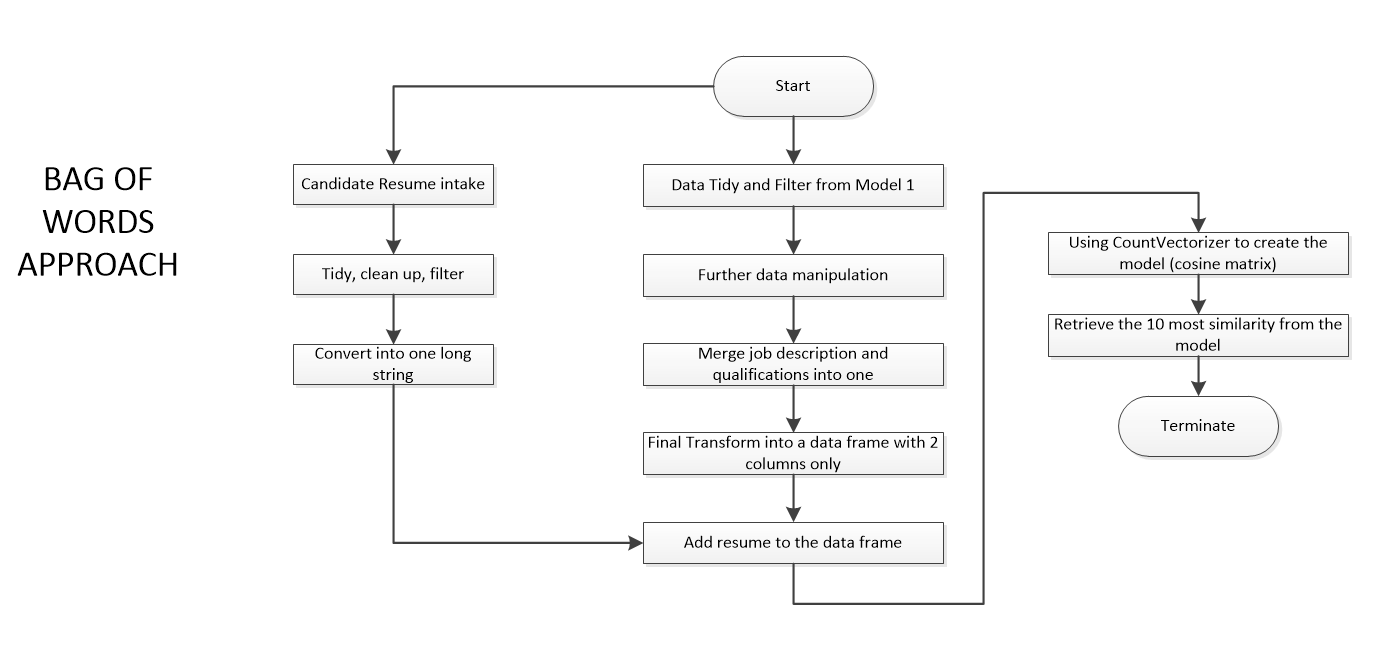